In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow-Version:{}".format(tf.__version__))

imageHeight = 256
imageWidth  = 256

TensorFlow-Version:2.0.0-beta0


In [2]:
# 建立识别模型，并且加载已经训练好的模型参数
#Xception模型参数初始化
conv_base = keras.applications.xception.Xception(weights = None,include_top=False,input_shape=(imageHeight,imageWidth,3),pooling='avg')

# 识别模型建立
model = keras.Sequential([
    conv_base,
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

# 加载已经训练好的参数
model.load_weights('../common/models/xception_test_weight.h5')

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 21,911,081
Trainable params: 21,856,553
Non-trainable params: 54,528
_________________________________________________________________


是猫的概率为:[0.40992862]
这不是一只猫


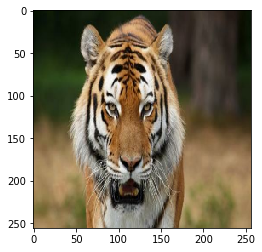

In [14]:
def load_image(imageFilePath):
#     path = img_conversion_to_jpeg(imageFilePath)
    image = tf.io.read_file(imageFilePath)
    image = tf.image.decode_jpeg(image,channels=3)
    image = tf.image.resize(image,[imageHeight,imageWidth])
    image = tf.cast(image,tf.float32)
    image = image/255    
    image = image.numpy()
    image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
    return image

#这个路径下面有的图1.jpg,2.png,3.png，4.jpg，5.jpg，6.jpeg，7.png，8.jpg，9.jpeg，10.jpg，11.jpg，12.jpg
#13.jpg,14.jpg,15.jpg,16.jpg,17.png
image = load_image('../common/images/11.jpg')
plt.imshow(image[0])

# 预测图片是否是猫
percent = model.predict(image)[0]
print("是猫的概率为:{}".format(percent))
isCat = percent>0.5
if isCat:
    print("这是一只猫")
else:
    print("这不是一只猫")